In [36]:
import pandas as pd
import numpy as np
import os
from os.path import join, pardir
DATA_DIR = join(pardir, pardir, 'data', 'write_new')
DATA_DIR_ZK = join(pardir, pardir, 'data', 'write_zookeeper')

dfs = []
dfs2 = []
for mem in [512, 1024, 2048]:
    
    for size in [4, 1024, 65536, 131072, 256000]:
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        df['size'] = size / 1024
        
        #print(df)
        # data is broken :-(
        #df = df.loc[df['memory'] == mem]
        #df = df.groupby(['memory', 'function']).head(150).reset_index(drop=True)
        #if df.shape[0] > 200:
        #    print(size, mem)
        dfs.append(df)
        
        
        zk = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}_processed.csv'), index_col=0)
        
        
        df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_{mem}.csv'), index_col=0)
        #df = df.groupby(['memory', 'size']).head(100).reset_index(drop=True)
        df['size'] = size / 1024
        df['data'] /= 1000.0
        #df.loc[df['op'] == 'set_data', 'data'] /= 1000
        dfs2.append(df)

for size in [4, 1024, 65536, 131072, 256000]:
    df = pd.read_csv(join(DATA_DIR_ZK, f'interregion_{size}.csv'), index_col=0)
    df['data'] /= 1000.0
    df['size'] /= 1024.0
    df['memory'] = 'ZooKeeper'
    dfs2.append(df)

        
dynamo_df = pd.concat(dfs)
dynamo_df['system'] = 'persistent'
dynamo_df_client = pd.concat(dfs2)
dynamo_df_client['system'] = 'persistent'
print(dynamo_df_client.loc[dynamo_df_client['memory'] == 'ZooKeeper'])
print(dynamo_df)



       data  client_write_data        op     memory        size      system
0     4.074                NaN  set_data  ZooKeeper    0.003906  persistent
1     4.041                NaN  set_data  ZooKeeper    0.003906  persistent
2     3.772                NaN  set_data  ZooKeeper    0.003906  persistent
3     3.598                NaN  set_data  ZooKeeper    0.003906  persistent
4     3.351                NaN  set_data  ZooKeeper    0.003906  persistent
..      ...                ...       ...        ...         ...         ...
145  34.913                NaN  set_data  ZooKeeper  250.000000  persistent
146   9.084                NaN  set_data  ZooKeeper  250.000000  persistent
147  34.226                NaN  set_data  ZooKeeper  250.000000  persistent
148   9.794                NaN  set_data  ZooKeeper  250.000000  persistent
149  57.683                NaN  set_data  ZooKeeper  250.000000  persistent

[750 rows x 6 columns]
                                   request    time  billed_time 

In [81]:

DATA_DIR = join(pardir, pardir, 'data', 'write_new')
dfs = []

# lock atomic commit push rest
barplot_data = [[],[],[],[],[]]
#barplot_stds = [[],[],[],[],[],[]]
#for size in [4, 1024, 65536, 131072, 256000]:
size = 4
memory = 512
df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_summary.csv'),index_col=None)
df['size'] = size / 1024.0
df['value'] *= 1000.0
df['value'] /= df['repetitions']
print(df.loc[(df['memory'] == memory) & (df['function'] == 'writer')])

barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total

memory = 2048
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total


size = 65536
memory = 512
df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_summary.csv'),index_col=None)
df['size'] = size / 1024.0
df['value'] *= 1000.0
df['value'] /= df['repetitions']
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total



memory = 2048
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total

size = 256000
memory = 512
df = pd.read_csv(join(DATA_DIR, f'persistent_{size}_summary.csv'),index_col=None)
df['size'] = size / 1024.0
df['value'] *= 1000.0
df['value'] /= df['repetitions']
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total



memory = 2048
barplot_data[0].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'lock')]['value'].values[0])
barplot_data[1].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'atomic')]['value'].values[0])
barplot_data[2].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'commit')]['value'].values[0])
barplot_data[3].append(df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'push')]['value'].values[0])
total = df.loc[(df['memory'] == memory) & (df['function'] == 'writer') & (df['type'] == 'total')]['value'].values[0]
barplot_data[4].append(
    total
    - barplot_data[0][-1] - barplot_data[1][-1] - barplot_data[2][-1] - barplot_data[3][-1]
)
#for i in range(5):
#    barplot_data[i][-1] /= total

print(barplot_data)

      type      value  memory function  repetitions      size
10   total  36.995810     512   writer          200  0.003906
11    lock   8.440269     512   writer          200  0.003906
12  atomic   7.294192     512   writer          200  0.003906
13  commit   7.628089     512   writer          200  0.003906
14    push  13.571049     512   writer          200  0.003906
[[8.440269231796265, 8.0808424949646, 7.637608051300049, 7.9447007179260005, 10.694314241409302, 6.457237005233765], [7.294192314147949, 7.201855182647705, 8.283936977386475, 7.077442407608032, 11.212286949157715, 6.633477210998535], [7.628089189529419, 7.4994635581970215, 6.969413757324219, 7.131441831588745, 6.508811712265015, 5.640406608581543], [13.571048974990847, 13.707723617553711, 72.17900156974791, 34.25863027572632, 247.31541991233826, 89.16152715682983], [0.06221055984496893, 0.06586432456970215, 0.3603339195251607, 0.37488102912905674, 1.5754222869873047, 1.0420787334441997]]


In [5]:
# cost compute
# DynamoDB
dynamodb_r_cost = 0.25 / 10**6
dynamodb_w_cost = 1.25 / 10**6

dynamodb_stream = 0.02 / 100000

request_cost = 0.20 / 10**6
# per mb-second
duration_cost = 0.0000166667
# dynamodb cost
import numpy as np
requests = 1000

dynamo_df['compute_cost'] = dynamo_df['billed_time'] * dynamo_df['memory'] * (duration_cost / 1000) / 1024.0
dynamo_df['compute_cost_dollar'] = dynamo_df['compute_cost']  * requests

# push to queue + 2 locks + 1 counter + 1 system storage
writer_function = dynamo_df.loc[dynamo_df['function'] == 'writer']
dynamo_df.loc[dynamo_df['function'] == 'writer', 'database_cost'] = 3 + 1 + np.ceil(writer_function['size'])
dynamo_df.loc[dynamo_df['function'] == 'writer', 'database_cost_dollar'] = (3 + 1 + np.ceil(writer_function['size']))*dynamodb_w_cost*requests

# 1 write to storage
distributor_function = dynamo_df.loc[dynamo_df['function'] == 'distributor']
dynamo_df.loc[dynamo_df['function'] == 'distributor', 'database_cost'] = np.ceil(distributor_function['size'])
dynamo_df.loc[dynamo_df['function'] == 'distributor', 'database_cost_dollar'] = np.ceil(distributor_function['size'])*dynamodb_w_cost*requests

#df['database_cost'] = df['cost'] * dynamodb_r_cost
# convert to cents
# 1k requests
dynamo_df['requests_costs'] = request_cost * requests
dynamo_df['stream_cost'] = dynamodb_stream * 2 * requests + np.ceil(dynamo_df['size'])*dynamodb_w_cost*requests
dynamo_df['total_cost'] = dynamo_df['compute_cost_dollar'] + dynamo_df['database_cost_dollar']
dynamo_df['other_cost'] =  dynamo_df['stream_cost'] + dynamo_df['requests_costs']

print(dynamo_df)

#df['total_cost'] *= 100

costs = []
for mem in [128, 256, 512, 1024, 2048]:
    
    for size in [4, 1024, 65536, 131072, 408576]:
        size /=1024.0
        #df = pd.read_csv(join(DATA_DIR, f'dynamo_{size}_{mem}_processed.csv'), index_col=0)
        #df = df.loc[df['memory'] == mem]
        #print(mem, size, df.shape[0])
        #df = df.groupby(['memory', 'function']).head(100).reset_index(drop=True)
        x = dynamo_df.loc[(dynamo_df['memory'] == mem) & (dynamo_df['size'] == size)]
        x1 = x.groupby(['function'])
        print([size, mem, x1['total_cost'].mean()['distributor'], x1['total_cost'].mean()['writer'],  request_cost * requests +  dynamodb_stream * 2 * requests])
        
        costs.append([size, mem, x1['total_cost'].mean()['distributor'] + x1['total_cost'].mean()['writer'] +  request_cost * requests +  x1['stream_cost'].mean()['writer']])
        #costs.append([size, mem, ])
        #print(x)
df_costs = pd.DataFrame(data=costs, columns=['size', 'memory', 'cost'])
print(df_costs)


                                  request    time  billed_time  memory  \
0    fc98551f-e1e2-42f3-9914-bf46734193fd  131.91          132     128   
1    4b2b15c6-d155-496b-859c-754988da0edb  129.98          130     128   
2    90ac8122-0e88-444e-ae8e-d911bc9925da  145.27          146     128   
3    59c2ed15-5a4e-407d-b6ac-ede095567193  127.30          128     128   
4    0ec8a976-18c1-4de7-8cd9-c720bc7292b4  137.49          138     128   
..                                    ...     ...          ...     ...   
195  c64b8c06-297d-43e9-89f5-fc3177fe9b06   85.38           86    2048   
196  c264ec44-b05f-47a9-b888-23f4df13d3b6  111.44          112    2048   
197  dd740296-b652-4880-a809-3fd8559ce0d5   86.51           87    2048   
198  dbf0d3e0-b219-4e65-8e42-a236331ab2e0   90.36           91    2048   
199  be35527d-5775-427d-a6bf-a2c7ff7e5c56   78.13           79    2048   

     used_memory                                  read  write     function  \
0             82  fc98551f-e1e2-4

/tmp/ipykernel_3384744/2364432367.py:80: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


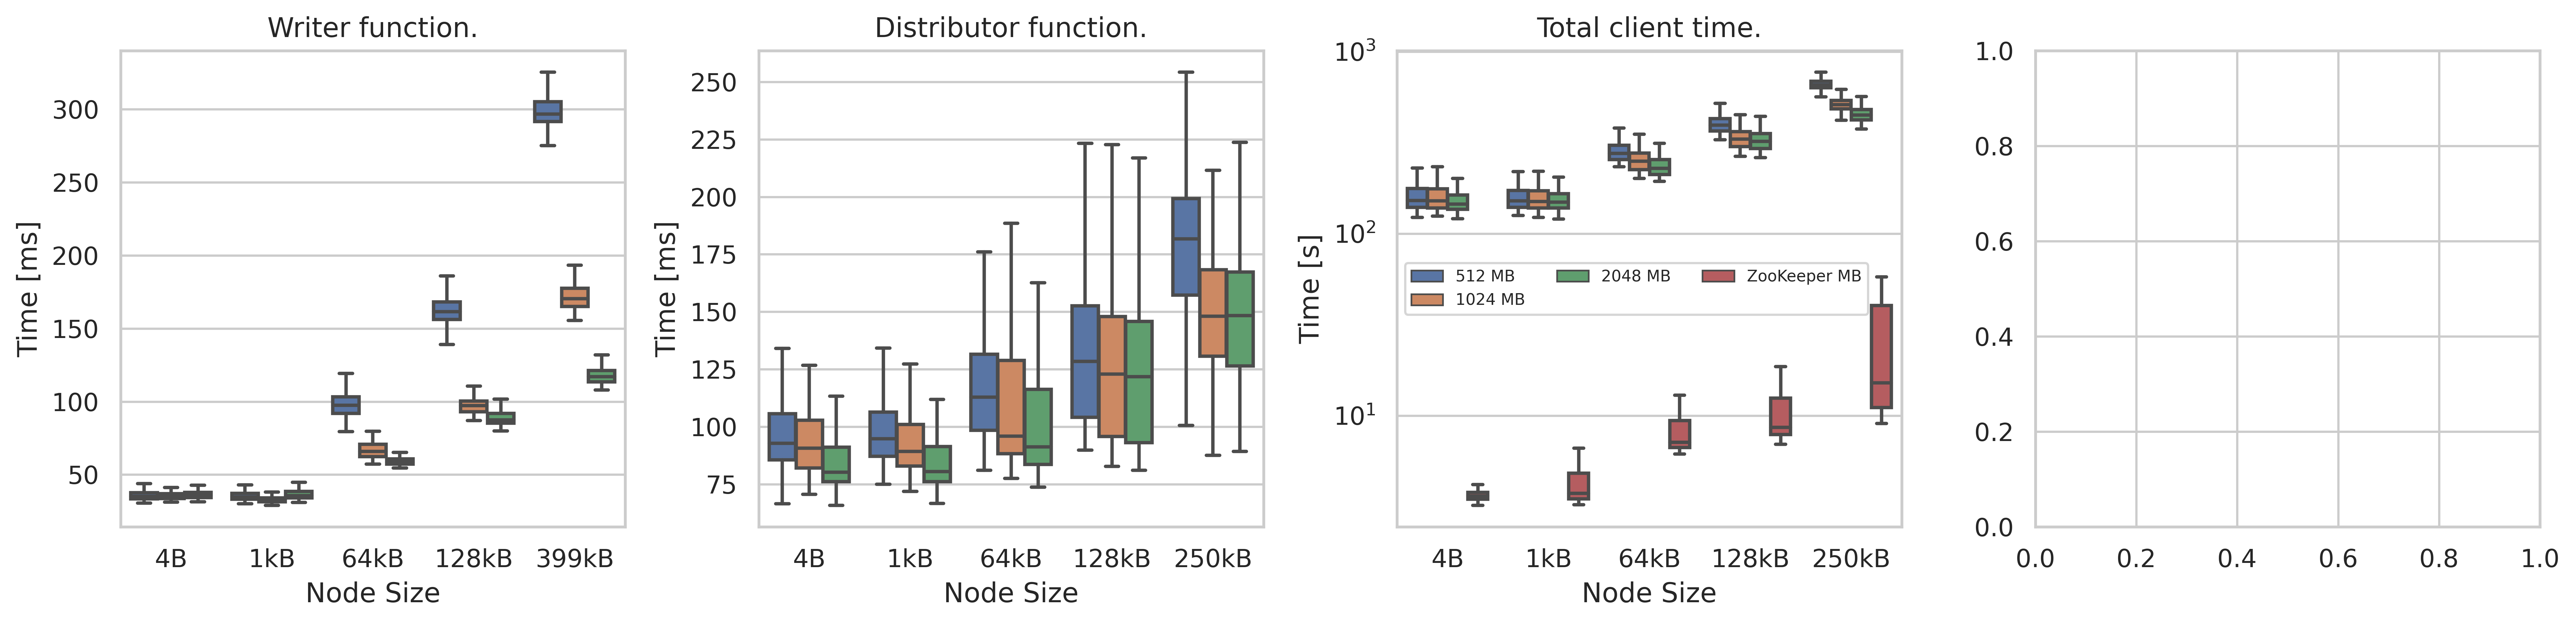

In [40]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from os.path import join, pardir

DATA_DIR = join(pardir, pardir, 'data', 'read')

#sns.set(rc={'figure.figsize':(16,8)})
sns.set(rc={'figure.figsize':(16,4)})
sns.set_style("whitegrid")

fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(1,8)
writer = fig3.add_subplot(gs[0, 0:2])
distr1 = fig3.add_subplot(gs[0, 2:4])
total = fig3.add_subplot(gs[0, 4:6])
barplot = fig3.add_subplot(gs[0,6:8])

penguins = sns.load_dataset("penguins")

tips = sns.load_dataset("tips")
# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="time",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='writer'], ax=writer,showfliers=False)

handles, labels = g.get_legend_handles_labels()
g.legend().set_visible(False)
#(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [ms]',fontsize=12)
g.set_title('Writer function.', fontsize=12)

# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="time",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='distributor'], ax=distr1,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend().set_visible(False)

#g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [ms]',fontsize=12)
g.set_title('Distributor function.', fontsize=12)


s3_df_client['data']/=1000.0
# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="data",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df_client.loc[dynamo_df_client['op']=='set_data'], ax=total,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=3) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=12)
g.set_ylabel('Time [s]',fontsize=12)
g.set_title('Total client time.', fontsize=12)
g.set_yscale('log')


# Draw a nested barplot by species and sex
g = sns.barplot(x="size", y="cost",
            hue="memory", #palette=["m", "g"],
            data=s3_costs, ax=time2)#,showfliers=False)
handles, labels = g.get_legend_handles_labels()
g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=3) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '399kB') )
g.set_xlabel('Node size',fontsize=12)
g.set_ylabel('Cost [$]',fontsize=12)
g.set_title('Cost of 1000 requests, user storage: S3', fontsize=12)


plt.rcParams['figure.dpi'] = 500
plt.tight_layout()
plt.savefig("plot_small.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

/tmp/ipykernel_3384744/2358196928.py:134: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


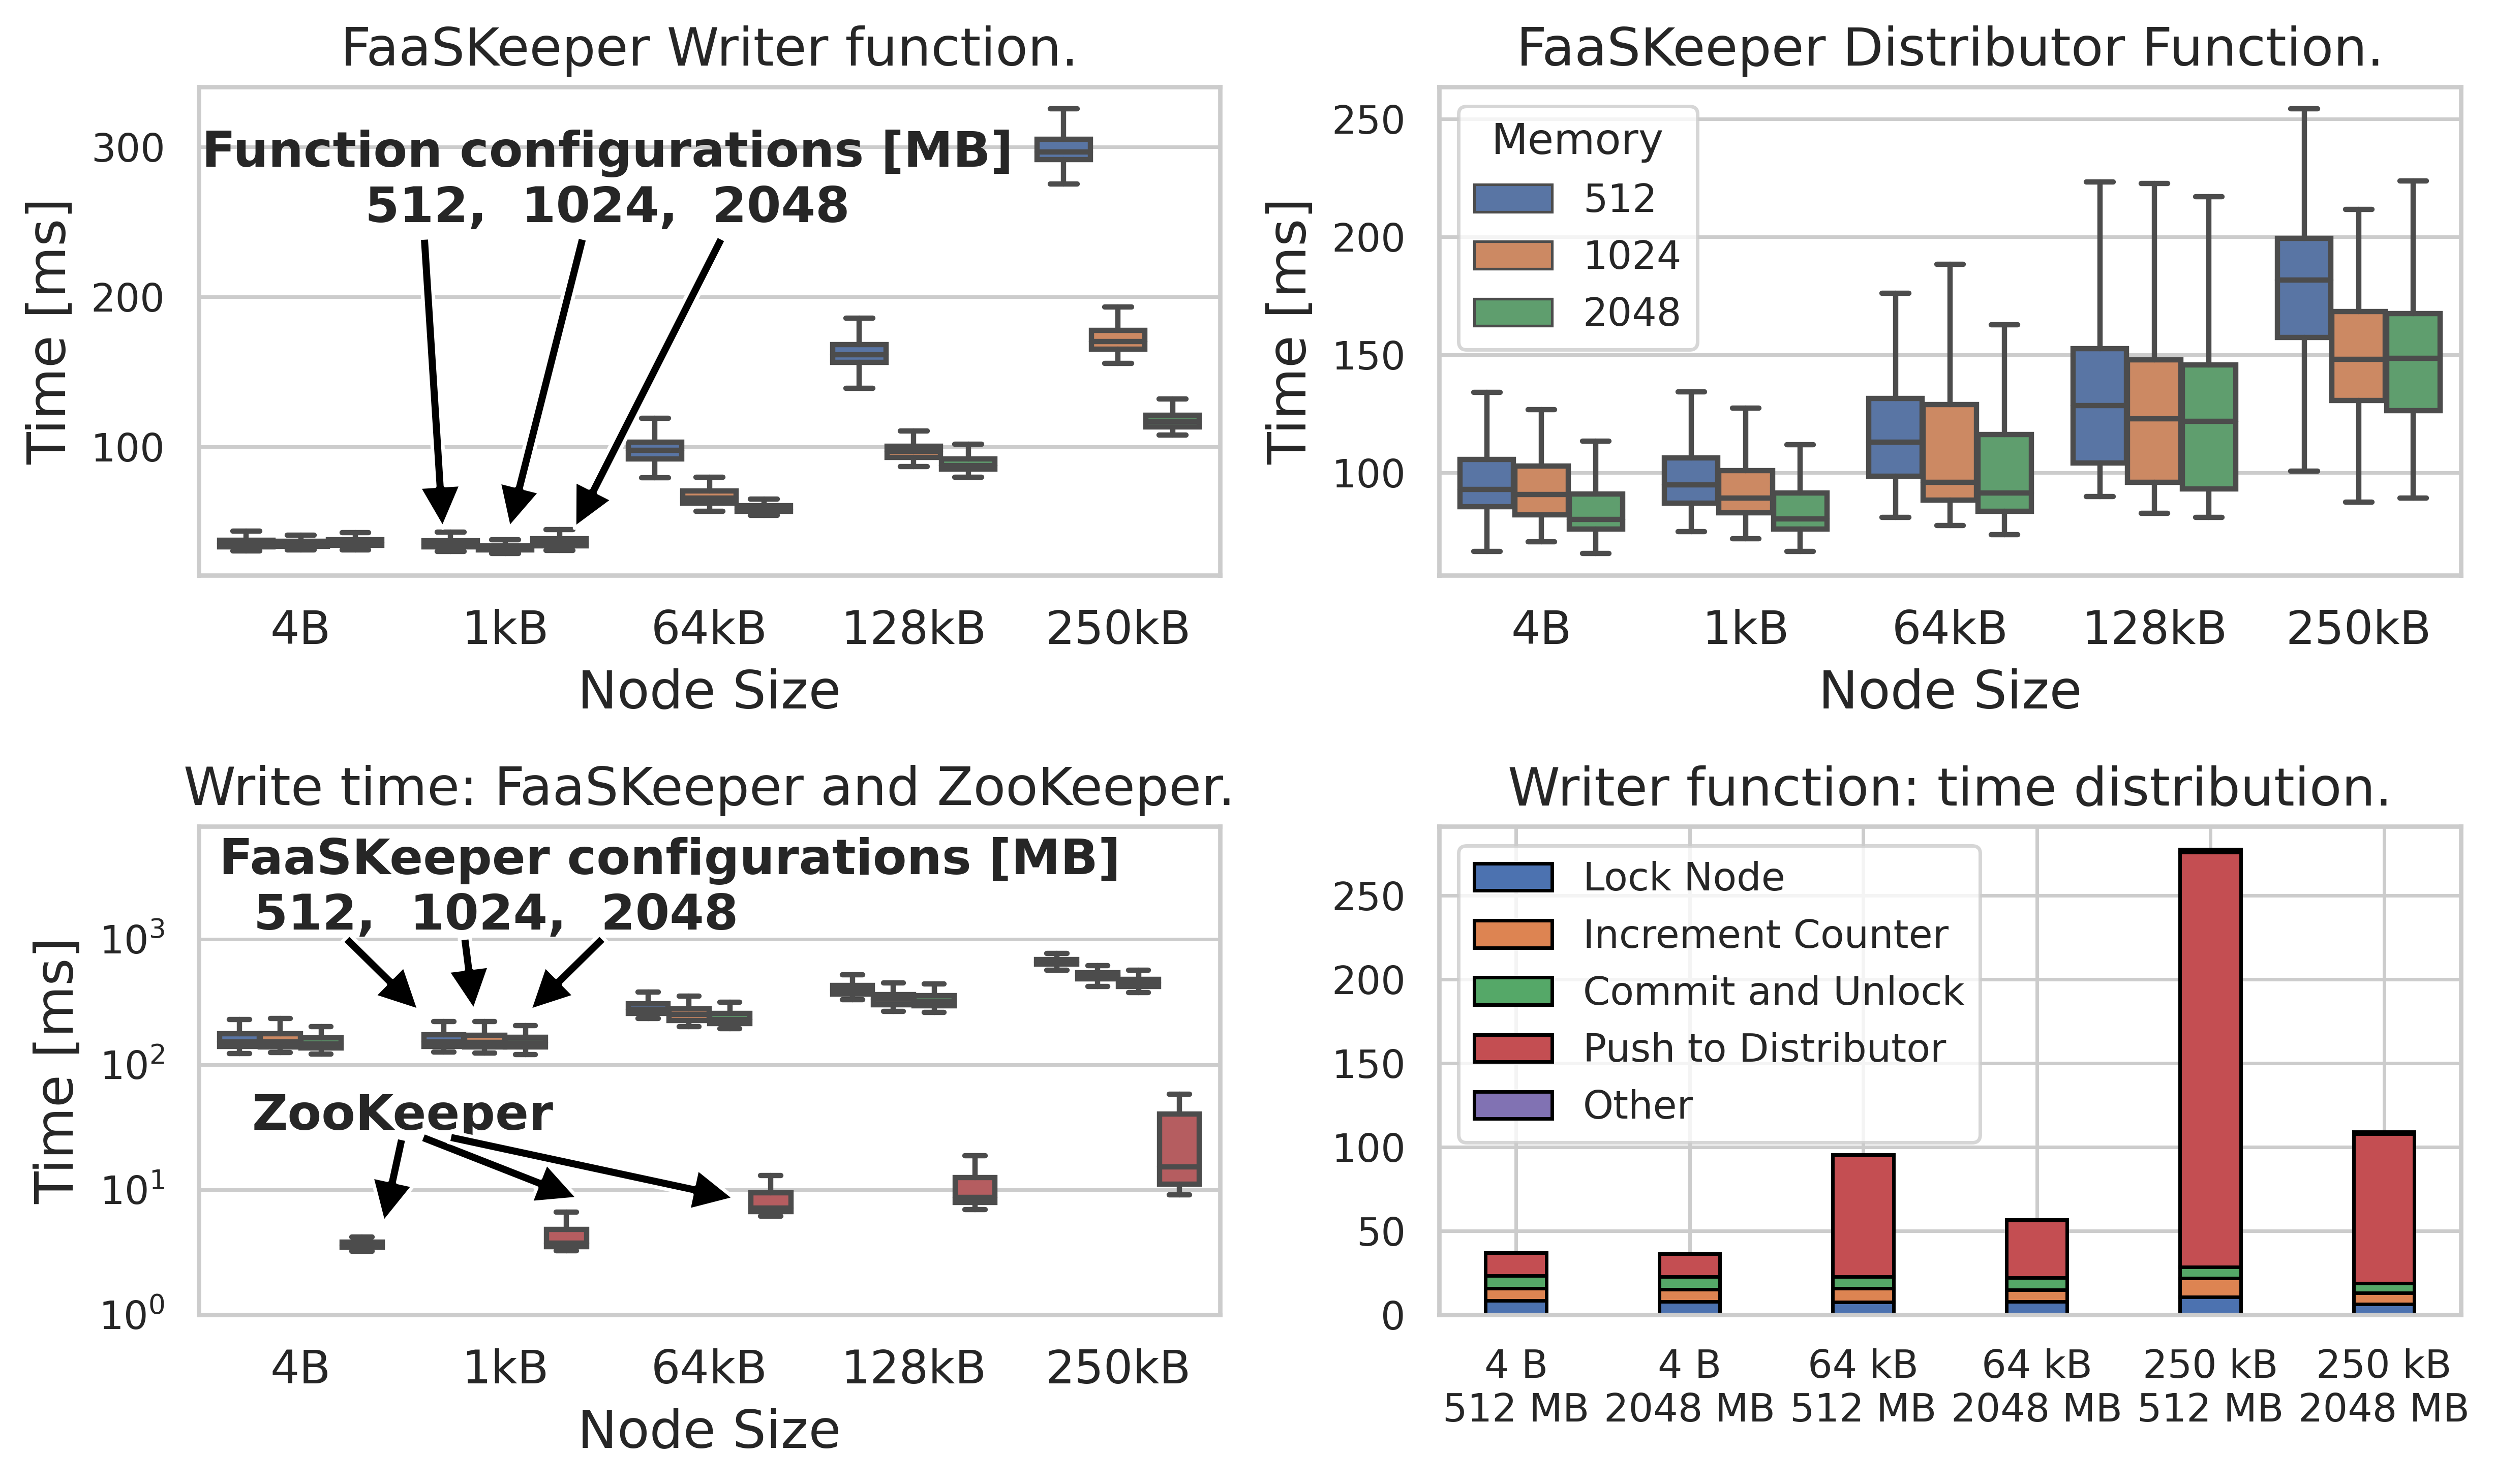

In [209]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from scipy import stats
from os.path import join, pardir

DATA_DIR = join(pardir, pardir, 'data', 'read')

#sns.set(rc={'figure.figsize':(16,8)})
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")

fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(2,4)
writer = fig3.add_subplot(gs[0, 0:2])
distr1 = fig3.add_subplot(gs[0, 2:4])
total = fig3.add_subplot(gs[1, 0:2])
barplot = fig3.add_subplot(gs[1,2:4])

# Draw a nested barplot by species and sex
dynamo_df.rename(columns={'memory': 'Memory'}, inplace=True)
#print(dynamo_df)
g = sns.boxplot(x="size", y="time",
            hue="Memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='writer'], ax=writer,showfliers=False)

handles, labels = g.get_legend_handles_labels()
#g.legend().set_visible(False)
#(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)

g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=15)
g.set_ylabel('Time [ms]',fontsize=15)
g.set_title('FaaSKeeper Writer function.', fontsize=15)
g.tick_params(axis='x', labelsize=13)
#g.set_yscale('log')
g.legend().set_visible(False)

#for xtick in g.get_xticks():
#    print(xtick)
#    g.text(xtick,100,'100', horizontalalignment='center')#,size='x-small',color='w',weight='semibold')
                  #medians[xtick] + vertical_offset,medians[xtick], 
            #horizontalalignment='center',size='x-small',color='w',weight='semibold')

g.annotate('Function configurations [MB]\n512,  1024,  2048',fontweight='bold',
            xy=(1.5, 250), xytext=(1.5, 250), fontsize=14, ha='center')
g.annotate('', fontweight='bold',
            xy=(0.7, 35), xytext=(0.6, 250), fontsize=14,
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1, 35), xytext=(1.4, 250), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1.3, 35), xytext=(2.1, 250), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')

# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="time",
            hue="Memory", #palette=["m", "g"],
            data=dynamo_df.loc[dynamo_df['function']=='distributor'], ax=distr1,showfliers=False)
handles, labels = g.get_legend_handles_labels()
#g.legend().set_visible(False)
g.tick_params(axis='x', labelsize=13)


#g.legend(handles, [f"{m} MB" for m in labels], fontsize=7, ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=15)
g.set_ylabel('Time [ms]',fontsize=15)
g.set_title('FaaSKeeper Distributor Function.', fontsize=15)

s3_df_client['data']/=1000.0
# Draw a nested barplot by species and sex
g = sns.boxplot(x="size", y="data",
            hue="memory", #palette=["m", "g"],
            data=dynamo_df_client.loc[dynamo_df_client['op']=='set_data'], ax=total,showfliers=False)
handles, labels = g.get_legend_handles_labels()

g.legend(handles, ['512 MB', '1024 MB', '2048 MB', 'ZooKeeper'], loc='upper left',ncol=2) #, bbox_to_anchor=(-0.03, -0.45), loc='lower center', handletextpad=0.4, fontsize=20)
g.set_xticklabels( ('4B', '1kB','64kB', '128kB', '250kB') )
g.set_xlabel('Node Size',fontsize=15)
g.set_ylabel('Time [ms]',fontsize=15)
g.set_title('Write time: FaaSKeeper and ZooKeeper.', fontsize=15)
g.set_yscale('log')
g.set_ylim(1, 8000)
g.legend().set_visible(False)
g.tick_params(axis='x', labelsize=13)


#g.annotate('Functions: 512 MB, 1024 MB\nand 2048 MB.',
#            xy=(0.7, 250), xytext=(0, 1000), fontsize=12, fontweight='bold',
#            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='left')
g.annotate('FaaSKeeper configurations [MB]\n  512,  1024,  2048', fontweight='bold',
            xy=(0, 1000), xytext=(-0.4, 1200), fontsize=14, ha='left')
g.annotate('',
            xy=(0.85, 250), xytext=(0.8, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1.1, 250), xytext=(1.5, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(0.6, 250), xytext=(0.2, 1100), fontsize=14, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')

g.annotate('ZooKeeper', fontweight='bold',
            xy=(0, 1000), xytext=(0.5, 30), fontsize=14, ha='center')
g.annotate('',
            xy=(0.4, 5), xytext=(0.5, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(1.4, 8), xytext=(0.55, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')
g.annotate('',
            xy=(2.2, 8), xytext=(0.65, 28), fontsize=12, fontweight='bold',
            arrowprops=dict(facecolor='black', shrink=0.05, width=3,lw=1), ha='center')


width = 0.35       # the width of the bars: can also be len(x) sequence
sum_ = [0,0,0,0,0,0]
labels = ['4 B\n512 MB', '4 B\n2048 MB', '64 kB\n512 MB', '64 kB\n2048 MB', '250 kB\n512 MB', '250 kB\n2048 MB']
for id, col in enumerate(['Lock Node', 'Increment Counter', 'Commit and Unlock', 'Push to Distributor', 'Other']):

    barplot.bar(labels, barplot_data[id], width, label=col, bottom=sum_, edgecolor='black')
    sum_ = np.add(sum_, barplot_data[id])
barplot.legend()

barplot.set_title('Writer function: time distribution.', fontsize=15)
#barplot.tick_params(axis='x', labelsize=12)

plt.rcParams['figure.dpi'] = 500
plt.tight_layout()
plt.savefig("plot_small_2x2_log.pdf",bbox_inches='tight',pad_inches = 0, transparent=False)

In [123]:
def annotate_boxplot(bpdict, annotate_params=None,
                     x_offset=0.05, x_loc=0,
                     text_offset_x=35,
                     text_offset_y=20):
    """Annotates a matplotlib boxplot with labels marking various centile levels.

    Parameters:
    - bpdict: The dict returned from the matplotlib `boxplot` function. If you're using pandas you can
    get this dict by setting `return_type='dict'` when calling `df.boxplot()`.
    - annotate_params: Extra parameters for the plt.annotate function. The default setting uses standard arrows
    and offsets the text based on other parameters passed to the function
    - x_offset: The offset from the centre of the boxplot to place the heads of the arrows, in x axis
    units (normally just 0-n for n boxplots). Values between around -0.15 and 0.15 seem to work well
    - x_loc: The x axis location of the boxplot to annotate. Usually just the number of the boxplot, counting
    from the left and starting at zero.
    text_offset_x: The x offset from the arrow head location to place the associated text, in 'figure points' units
    text_offset_y: The y offset from the arrow head location to place the associated text, in 'figure points' units
    """
    if annotate_params is None:
        annotate_params = dict(xytext=(text_offset_x, text_offset_y), textcoords='offset points', arrowprops={'arrowstyle':'->'})

    plt.annotate('Median', (x_loc + 1 + x_offset, bpdict['medians'][x_loc].get_ydata()[0]), **annotate_params)
    plt.annotate('25%', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[0]), **annotate_params)
    plt.annotate('75%', (x_loc + 1 + x_offset, bpdict['boxes'][x_loc].get_ydata()[2]), **annotate_params)
    plt.annotate('5%', (x_loc + 1 + x_offset, bpdict['caps'][x_loc*2].get_ydata()[0]), **annotate_params)
    plt.annotate('95%', (x_loc + 1 + x_offset, bpdict['caps'][(x_loc*2)+1].get_ydata()[0]), **annotate_params)